# Exercises

***continuous_probabilistic_methods.py*** or ***continuous_probabilistic_methods.ipynb*** 

1. Define a function named get_lower_and_upper_bounds that has two arguments. THe first argument is pandas Series. The second argument is the multiplier, which should have a default argument of 1.5.

In [107]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt


In [2]:
x = pd.Series(np.random.randint(1,100,101)).sort_values().reset_index().drop(columns=['index'])


In [3]:
x.rename(columns = {0: 'ints'},inplace = True)

In [4]:
x

,ints
0,3
1,5
2,7
3,7
4,8
5,9
6,10
7,11
8,12
9,13


In [5]:
len(x)

101

In [6]:
x[50:51]

,ints
50,58


In [7]:
np.percentile(x, 50)

58.0

In [8]:
a = np.array([0,1,2,3,4])

In [9]:
np.percentile(a,75)

3.0

In [10]:
np.percentile(x,75)

77.0

In [11]:
q3 = x[x.ints <= np.percentile(x,75)]
q3

,ints
0,3
1,5
2,7
3,7
4,8
5,9
6,10
7,11
8,12
9,13


In [12]:
x[x.ints >= np.percentile(x,25)] 

,ints
25,34
26,34
27,34
28,37
29,37
30,37
31,38
32,38
33,39
34,42


In [13]:
np.percentile(x,25)

34.0

In [14]:
q1 = np.percentile(x,25)
q1

34.0

In [15]:
q3 = np.percentile(x,75)
q3

77.0

In [16]:
iqr = q3-q1
iqr

43.0

In [17]:
upper_inner_fence = q3 + 1.5*iqr
upper_inner_fence

141.5

In [18]:
lower_inner_fence = q1 - 1.5*iqr
lower_inner_fence

-30.5

In [19]:
upper_outer_fence = q3 + 3*iqr
upper_outer_fence

206.0

In [20]:
lower_outer_fence = q1 -3*iqr
lower_outer_fence

-95.0

In [21]:
def get_lower_and_upper_bounds(y, multiplier = 1.5):
    q1 = np.percentile(y,25)
    q3 = np.percentile(y,75)
    iqr = q3 - q1
    upper_bound = q3 + multiplier*iqr
    lower_bound = q1 - multiplier*iqr
    return upper_bound, lower_bound

In [22]:
x = np.random.randint(1,100,100)

In [23]:
get_lower_and_upper_bounds(x)

(138.625, -38.375)

1. Using `lemonade.csv` dataset and focusing on continuous variables:
    - Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of `lemonade.csv`, using the multiplier of 1.5. Do these outliers make sense? Which outliers should be kept?

In [24]:
df = pd.read_csv('lemonade.csv')
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
5,1/6/17,Friday,25.3,1.54,23,0.5,11
6,1/7/17,Saturday,32.9,1.54,19,0.5,13
7,1/8/17,Sunday,37.5,1.18,28,0.5,15
8,1/9/17,Monday,38.1,1.18,20,0.5,17
9,1/10/17,Tuesday,43.4,1.05,33,0.5,18


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
Date           365 non-null object
Day            365 non-null object
Temperature    365 non-null float64
Rainfall       365 non-null float64
Flyers         365 non-null int64
Price          365 non-null float64
Sales          365 non-null int64
dtypes: float64(3), int64(2), object(2)
memory usage: 20.0+ KB


In [26]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.589041
std,18.085892,0.273890,13.786445,0.0,29.979680
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [27]:
np.percentile(df.Temperature,25)

49.7

In [28]:
np.percentile(df.Temperature,75)

71.7

In [29]:
upper_bound, lower_bound = get_lower_and_upper_bounds(df.Temperature)

In [91]:
def bound_list(df, multiplier = 1.5):
    bl= []
    for a in df.select_dtypes('number').columns:
        upper_bound, lower_bound = get_lower_and_upper_bounds(df[a],multiplier)
        bl.append([upper_bound, lower_bound])
    return bl

In [92]:
bl = bound_list(df)
bl

[[104.7, 16.700000000000003],
 [1.3, 0.26],
 [76.0, 4.0],
 [0.5, 0.5],
 [45.0, 5.0]]

In [93]:
upper_bound_list = []
lower_bound_list = []
for x in range(0,len(bl)):
    upper_bound_list.append(bl[x][0])
    lower_bound_list.append(bl[x][1])
upper_bound_list, lower_bound_list

([104.7, 1.3, 76.0, 0.5, 45.0], [16.700000000000003, 0.26, 4.0, 0.5, 5.0])

In [94]:
bound_df = pd.DataFrame({'variable': df.select_dtypes('number').columns, 'upper_bounds': upper_bound_list, 'lower_bounds': lower_bound_list}).set_index('variable')
bound_df

,upper_bounds,lower_bounds
variable,,
Temperature,104.7,16.70
Rainfall,1.3,0.26
Flyers,76.0,4.00
Price,0.5,0.50
Sales,45.0,5.00


In [95]:
temp_upper = bound_df[bound_df.index == 'Temperature']['upper_bounds'][0]
temp_upper

104.7

In [96]:
temp_lower = bound_df[bound_df.index == 'Temperature']['lower_bounds'][0]
temp_lower

16.700000000000003

In [97]:
df[df.Temperature >= temp_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
41,2/11/17,Saturday,212.0,0.91,35,0.5,21


In [98]:
df[df.Temperature <= temp_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
364,12/31/17,Sunday,15.1,2.5,9,0.5,7


In [99]:
sales_upper = bound_df[bound_df.index == 'Sales']['upper_bounds'][0]
sales_upper

45.0

In [100]:
sales_lower = bound_df[bound_df.index == 'Sales']['lower_bounds'][0]
sales_lower

5.0

In [101]:
df[df.Sales >= sales_upper]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
183,7/3/17,Monday,81.5,0.54,68,0.5,235
184,7/4/17,Tuesday,84.2,0.59,49,0.5,534
185,7/5/17,Wednesday,93.0,0.40,55,0.5,99
258,9/16/17,Saturday,68.1,0.69,37,0.5,87


In [102]:
df[df.Sales <= sales_lower]

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales


- Using the multiplier of 3, IQR Range Rule, and the lower and upper bounds, identify the outliers below and lower bound in each column of `lemonade.csv`. Do these lower outliers make sense? Which outliers should be kept? 

In [103]:
bl3 = bound_list(df,3)
bl3

[[137.7, -16.299999999999997],
 [1.69, -0.13],
 [103.0, -23.0],
 [0.5, 0.5],
 [60.0, -10.0]]

In [104]:
upper_bound_list = []
lower_bound_list = []
for x in range(0,len(bl)):
    upper_bound_list.append(bl3[x][0])
    lower_bound_list.append(bl3[x][1])
upper_bound_list, lower_bound_list

([137.7, 1.69, 103.0, 0.5, 60.0],
 [-16.299999999999997, -0.13, -23.0, 0.5, -10.0])

In [105]:
bound_df = pd.DataFrame({'variable': df.select_dtypes('number').columns, 'upper_bounds': upper_bound_list, 'lower_bounds': lower_bound_list}).set_index('variable')
bound_df

,upper_bounds,lower_bounds
variable,,
Temperature,137.70,-16.30
Rainfall,1.69,-0.13
Flyers,103.00,-23.00
Price,0.50,0.50
Sales,60.00,-10.00


2. Identify if any columns in `lemonade.csv` are normally distributed. For normally distributed columns:
    - Use a 2 sigma decision rule to isolate the outliers:
        - Do these make sense?
        - Should certain outliers be kept or removed?

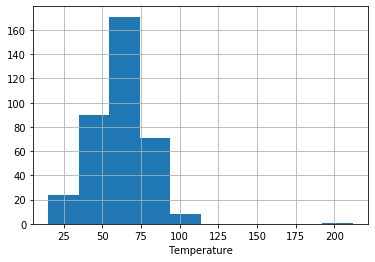

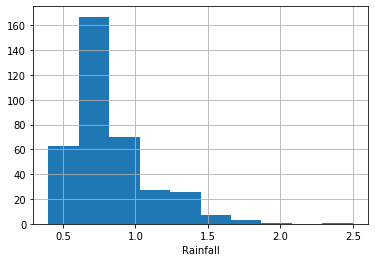

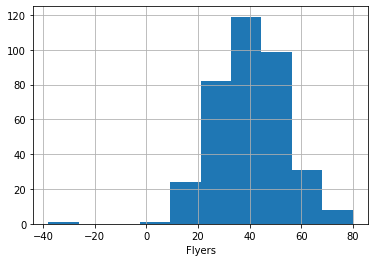

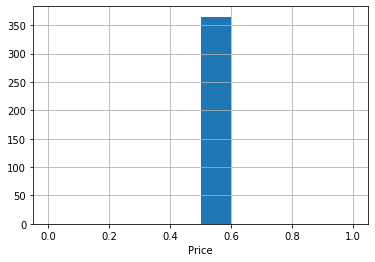

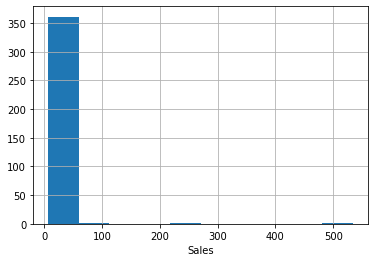

In [112]:
for x in df.select_dtypes('number').columns:
    df[x].hist()
    plt.xlabel(x)
    plt.show()

In [113]:
df.describe()

,Temperature,Rainfall,Flyers,Price,Sales
count,365.000000,365.000000,365.000000,365.0,365.000000
mean,61.224658,0.825973,40.104110,0.5,27.589041
std,18.085892,0.273890,13.786445,0.0,29.979680
min,15.100000,0.400000,-38.000000,0.5,7.000000
25%,49.700000,0.650000,31.000000,0.5,20.000000
50%,61.100000,0.740000,39.000000,0.5,25.000000
75%,71.700000,0.910000,49.000000,0.5,30.000000
max,212.000000,2.500000,80.000000,0.5,534.000000


In [115]:
normal_cols = ['Temperature', 'Rainfall', 'Flyers']

In [118]:
zscores_list = []
for x in normal_cols:
    zscores = pd.Series((df[x]-df[x].mean())/df[x].std())
    zscores_list.append(zscores)
zscores_list

[0     -1.892340
 1     -1.787286
 2     -1.477652
 3     -0.946852
 4     -1.040848
 5     -1.986336
 6     -1.566119
 7     -1.311777
 8     -1.278602
 9     -0.985556
 10    -1.582706
 11    -1.273073
 12    -1.311777
 13    -0.946852
 14    -0.985556
 15    -1.693290
 16    -1.604823
 17    -1.018731
 18    -1.002143
 19    -1.637998
 20    -1.383656
 21    -1.129314
 22    -1.278602
 23    -1.803873
 24    -1.604823
 25    -1.405773
 26    -1.057435
 27    -1.455535
 28    -1.438948
 29    -1.112727
          ...   
 335   -0.946852
 336   -1.532944
 337   -1.455535
 338   -2.168799
 339   -0.913677
 340   -1.057435
 341   -1.145902
 342   -1.660115
 343   -1.654586
 344   -0.891560
 345   -1.532944
 346   -1.604823
 347   -1.621411
 348   -1.057435
 349   -1.422360
 350   -1.604823
 351   -1.676702
 352   -1.096139
 353   -1.350481
 354   -1.145902
 355   -1.676702
 356   -1.040848
 357   -1.405773
 358   -1.422360
 359   -1.787286
 360   -1.024260
 361   -1.295189
 362   -1.2011

In [129]:
df['Temperature'][zscores_list[0].abs() > 2]

41     212.0
166     99.3
176    102.6
181    102.9
190     98.0
198     99.3
202     99.6
207     97.9
338     22.0
364     15.1
Name: Temperature, dtype: float64

In [130]:
df['Rainfall'][zscores_list[1].abs() > 2]

0      2.00
5      1.54
6      1.54
10     1.54
15     1.67
16     1.43
19     1.43
23     1.54
337    1.54
338    1.82
342    1.43
343    1.82
346    1.43
347    1.54
351    1.43
355    1.54
359    1.43
363    1.43
364    2.50
Name: Rainfall, dtype: float64

In [131]:
df['Flyers'][zscores_list[2].abs() > 2]

166    77
170    70
171    76
182    68
183    68
194    80
198    76
203    72
204    69
207    74
324   -38
338    11
364     9
Name: Flyers, dtype: int64

 - Now use a 3 sigma decision rule to isolate the outliers in the normally distributed columns from `lemonade.csv`

In [132]:
df['Temperature'][zscores_list[0].abs() > 3]

41    212.0
Name: Temperature, dtype: float64

In [133]:
df['Rainfall'][zscores_list[1].abs() > 3]

0      2.00
15     1.67
338    1.82
343    1.82
364    2.50
Name: Rainfall, dtype: float64

In [134]:
df['Flyers'][zscores_list[2].abs() > 3]

324   -38
Name: Flyers, dtype: int64